In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
credit_card_data = pd.read_csv("C:\\Users\\laptop\\Downloads\\archive_fraud\\creditcard.csv")
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
credit_card_data = credit_card_data.drop("Time", axis=1)

In [7]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.5)
cols = credit_card_data.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"
#define X and Y
X = credit_card_data[cols]
Y = credit_card_data[target]

Text(0.5, 1.0, 'After')

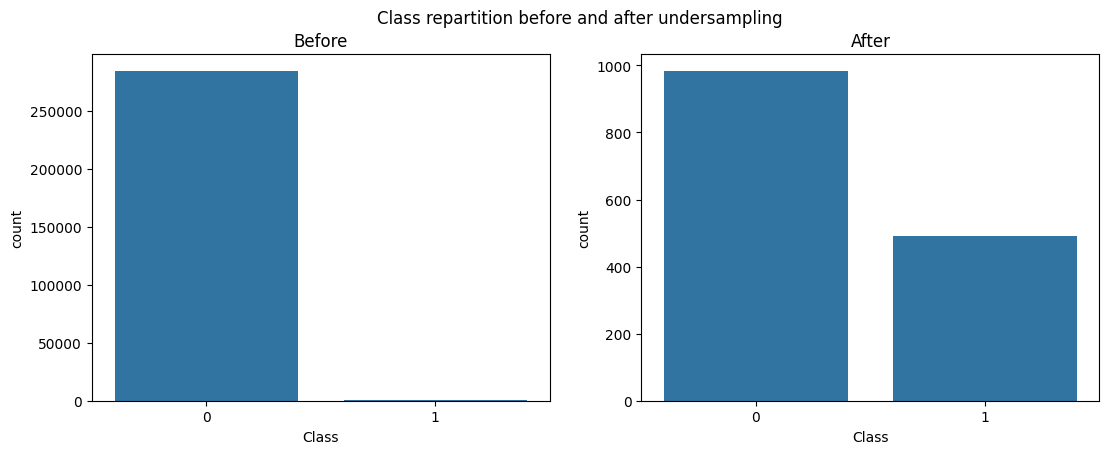

In [8]:
#undersample
X_under, Y_under = undersample.fit_resample(X, Y)
from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['Class'])
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=credit_card_data, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1, stratify=Y_under)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

<Axes: xlabel='Class', ylabel='count'>

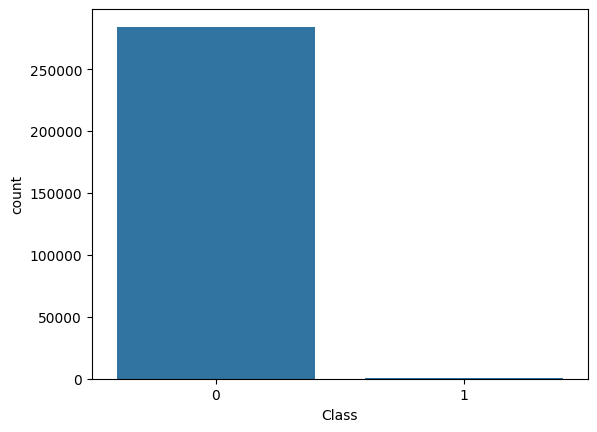

In [10]:
#standard scaling
X_train['std_Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape (-1,1))
X_test['std_Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))
#removing Amount
X_test = X_test.drop("Amount", axis=1)
X_train = X_train.drop("Amount", axis = 1)
sns.countplot(x="Class", data=credit_card_data)

In [11]:
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

#train the model
model = SVC(probability=True, random_state=2)
svm = model.fit(X_train, y_train)
#predictions
y_pred_svm = model.predict(X_test)
#scores
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy SVM: 0.9662162162162162
Precision SVM: 1.0
Recall SVM: 0.898989898989899
F1 Score SVM: 0.9468085106382979
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       197
           1       1.00      0.90      0.95        99

    accuracy                           0.97       296
   macro avg       0.98      0.95      0.96       296
weighted avg       0.97      0.97      0.97       296

